<a href="https://colab.research.google.com/github/kaz-taka-1/2-02_tag/blob/main/1%E7%AB%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [101]:
# 下記セルを実行すると、authorization codeの入力を求められます。
# 出力されたリンク先をクリックし、Googleアカウントにログインし、
# authorization codeをコピーし、貼り付けをおこなってください。
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [102]:
import os 
project = '100knock-process-visualization'
chapter = 1
os.chdir(f'/content/drive/MyDrive/{project}/chapter-{chapter}/')

# １章 システムデータの加工・可視化を行う２０本ノック

## ノック１：法人情報データを読み込んでみよう

In [103]:
import pandas as pd

In [104]:
data = pd.read_csv('data/22_shizuoka_all_20210331.csv',encoding='shift-jis',header=None)

In [105]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,1,1000013040008,1,1,2018-04-02,2015-10-05,静岡家庭裁判所,NaN,101,静岡県,...,NaN,NaN,2015-10-05,1,Shizuoka Family Court,Shizuoka,"1-20, Jonaicho, Aoi ku, Shizuoka shi",NaN,シズオカカテイサイバンショ,0
1,2,1000013050072,1,1,2018-04-02,2015-10-05,清水簡易裁判所,NaN,101,静岡県,...,NaN,NaN,2015-10-05,1,Shimizu Summary Court,Shizuoka,"1-6-15, Tenjin, Shimizu ku, Shizuoka shi",NaN,シミズカンイサイバンショ,0
2,3,1000013050080,1,1,2018-04-02,2015-10-05,浜松簡易裁判所,NaN,101,静岡県,...,NaN,NaN,2015-10-05,1,Hamamatsu Summary Court,Shizuoka,"1-12-5, Chuo, Naka ku, Hamamatsu shi",NaN,ハママツカンイサイバンショ,0
3,4,1000020222119,1,1,2018-04-05,2015-10-05,磐田市,NaN,201,静岡県,...,NaN,NaN,2015-10-05,1,Iwata City,Shizuoka,"3-1,Kounodai, Iwata shi",NaN,イワタシ,0
4,5,1000020222127,1,1,2018-04-05,2015-10-05,焼津市,NaN,201,静岡県,...,NaN,NaN,2015-10-05,1,Yaizu city,Shizuoka,"2-16-32 Honmachi, Yaizu shi",NaN,ヤイヅシ,0


In [106]:
len(data.columns)

30

In [107]:
data

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,1,1000013040008,1,1,2018-04-02,2015-10-05,静岡家庭裁判所,NaN,101,静岡県,...,NaN,NaN,2015-10-05,1,Shizuoka Family Court,Shizuoka,"1-20, Jonaicho, Aoi ku, Shizuoka shi",NaN,シズオカカテイサイバンショ,0
1,2,1000013050072,1,1,2018-04-02,2015-10-05,清水簡易裁判所,NaN,101,静岡県,...,NaN,NaN,2015-10-05,1,Shimizu Summary Court,Shizuoka,"1-6-15, Tenjin, Shimizu ku, Shizuoka shi",NaN,シミズカンイサイバンショ,0
2,3,1000013050080,1,1,2018-04-02,2015-10-05,浜松簡易裁判所,NaN,101,静岡県,...,NaN,NaN,2015-10-05,1,Hamamatsu Summary Court,Shizuoka,"1-12-5, Chuo, Naka ku, Hamamatsu shi",NaN,ハママツカンイサイバンショ,0
3,4,1000020222119,1,1,2018-04-05,2015-10-05,磐田市,NaN,201,静岡県,...,NaN,NaN,2015-10-05,1,Iwata City,Shizuoka,"3-1,Kounodai, Iwata shi",NaN,イワタシ,0
4,5,1000020222127,1,1,2018-04-05,2015-10-05,焼津市,NaN,201,静岡県,...,NaN,NaN,2015-10-05,1,Yaizu city,Shizuoka,"2-16-32 Honmachi, Yaizu shi",NaN,ヤイヅシ,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114608,114609,9700150095744,1,0,2019-09-27,2019-08-22,久根共有財産管理委員会,NaN,499,静岡県,...,NaN,NaN,2019-08-22,1,NaN,NaN,NaN,NaN,クネキヨウユウザイサンカンリイインカイ,0
114609,114610,9700150097253,1,0,2020-01-24,2019-12-26,静岡小児感染症研究会,NaN,499,静岡県,...,NaN,NaN,2019-12-26,1,NaN,NaN,NaN,NaN,シズオカシヨウニカンセンシヨウケンキユウカイ,0
114610,114611,9700150099530,1,0,2020-07-13,2020-06-23,北方領土返還要求静岡県民会議,NaN,499,静岡県,...,NaN,NaN,2020-06-23,1,NaN,NaN,NaN,NaN,ホツポウリヨウドヘンカンヨウキユウシズオカケンミンカイギ,0
114611,114612,9700150099852,1,0,2020-08-20,2020-07-22,両河内児童クラブ,NaN,499,静岡県,...,NaN,NaN,2020-07-22,1,NaN,NaN,NaN,NaN,リヨウゴウチジドウクラブ,0


In [108]:
data = pd.read_csv('data/22_shizuoka_all_20210331.csv',encoding='shift-jis',header=None,dtype=object)

In [109]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,1,1000013040008,01,1,2018-04-02,2015-10-05,静岡家庭裁判所,NaN,101,静岡県,...,NaN,NaN,2015-10-05,1,Shizuoka Family Court,Shizuoka,"1-20, Jonaicho, Aoi ku, Shizuoka shi",NaN,シズオカカテイサイバンショ,0
1,2,1000013050072,01,1,2018-04-02,2015-10-05,清水簡易裁判所,NaN,101,静岡県,...,NaN,NaN,2015-10-05,1,Shimizu Summary Court,Shizuoka,"1-6-15, Tenjin, Shimizu ku, Shizuoka shi",NaN,シミズカンイサイバンショ,0
2,3,1000013050080,01,1,2018-04-02,2015-10-05,浜松簡易裁判所,NaN,101,静岡県,...,NaN,NaN,2015-10-05,1,Hamamatsu Summary Court,Shizuoka,"1-12-5, Chuo, Naka ku, Hamamatsu shi",NaN,ハママツカンイサイバンショ,0
3,4,1000020222119,01,1,2018-04-05,2015-10-05,磐田市,NaN,201,静岡県,...,NaN,NaN,2015-10-05,1,Iwata City,Shizuoka,"3-1,Kounodai, Iwata shi",NaN,イワタシ,0
4,5,1000020222127,01,1,2018-04-05,2015-10-05,焼津市,NaN,201,静岡県,...,NaN,NaN,2015-10-05,1,Yaizu city,Shizuoka,"2-16-32 Honmachi, Yaizu shi",NaN,ヤイヅシ,0


In [110]:
data.dtypes

0     object
1     object
2     object
3     object
4     object
5     object
6     object
7     object
8     object
9     object
10    object
11    object
12    object
13    object
14    object
15    object
16    object
17    object
18    object
19    object
20    object
21    object
22    object
23    object
24    object
25    object
26    object
27    object
28    object
29    object
dtype: object

In [111]:
data=pd.read_csv('data/22_shizuoka_all_20210331.csv',encoding='shift-jis',header=None,dtype=object)

In [112]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,1,1000013040008,01,1,2018-04-02,2015-10-05,静岡家庭裁判所,NaN,101,静岡県,...,NaN,NaN,2015-10-05,1,Shizuoka Family Court,Shizuoka,"1-20, Jonaicho, Aoi ku, Shizuoka shi",NaN,シズオカカテイサイバンショ,0
1,2,1000013050072,01,1,2018-04-02,2015-10-05,清水簡易裁判所,NaN,101,静岡県,...,NaN,NaN,2015-10-05,1,Shimizu Summary Court,Shizuoka,"1-6-15, Tenjin, Shimizu ku, Shizuoka shi",NaN,シミズカンイサイバンショ,0
2,3,1000013050080,01,1,2018-04-02,2015-10-05,浜松簡易裁判所,NaN,101,静岡県,...,NaN,NaN,2015-10-05,1,Hamamatsu Summary Court,Shizuoka,"1-12-5, Chuo, Naka ku, Hamamatsu shi",NaN,ハママツカンイサイバンショ,0
3,4,1000020222119,01,1,2018-04-05,2015-10-05,磐田市,NaN,201,静岡県,...,NaN,NaN,2015-10-05,1,Iwata City,Shizuoka,"3-1,Kounodai, Iwata shi",NaN,イワタシ,0
4,5,1000020222127,01,1,2018-04-05,2015-10-05,焼津市,NaN,201,静岡県,...,NaN,NaN,2015-10-05,1,Yaizu city,Shizuoka,"2-16-32 Honmachi, Yaizu shi",NaN,ヤイヅシ,0


In [113]:
data.dtypes

0     object
1     object
2     object
3     object
4     object
5     object
6     object
7     object
8     object
9     object
10    object
11    object
12    object
13    object
14    object
15    object
16    object
17    object
18    object
19    object
20    object
21    object
22    object
23    object
24    object
25    object
26    object
27    object
28    object
29    object
dtype: object

In [114]:
mst = pd.read_csv('data/mst_column_name.txt',encoding='shift-jis',sep='\t')

In [115]:
mst.head()

,column_id,column_name_ja,column_name_en
0,1,一連番号,sequenceNumber
1,2,法人番号,corporateNumber
2,3,処理区分,process
3,4,訂正区分,correct
4,5,更新年月日,updateDate


In [116]:
len(mst) == len(data.columns)

True

In [117]:
columns=mst.column_name_en.values

In [118]:
columns

array(['sequenceNumber', 'corporateNumber', 'process', 'correct',
       'updateDate', 'changeDate', 'name', 'nameImageId', 'kind',
       'prefectureName', 'cityName', 'streetNumber', 'addressImageId',
       'prefectureCode', 'cityCode', 'postCode', 'addressOutside',
       'addressOutsideImageId', 'closeDate', 'closeCause',
       'successorCorporateNumber', 'changeCause', 'assignmentDate',
       'latest', 'enName', 'enPrefectureName', 'enCityName',
       'enAddressOutside', 'furigana', 'hihyoji'], dtype=object)

In [119]:
data.columns = columns

In [120]:
data.head()

,sequenceNumber,corporateNumber,process,correct,updateDate,changeDate,name,nameImageId,kind,prefectureName,...,successorCorporateNumber,changeCause,assignmentDate,latest,enName,enPrefectureName,enCityName,enAddressOutside,furigana,hihyoji
0,1,1000013040008,01,1,2018-04-02,2015-10-05,静岡家庭裁判所,NaN,101,静岡県,...,NaN,NaN,2015-10-05,1,Shizuoka Family Court,Shizuoka,"1-20, Jonaicho, Aoi ku, Shizuoka shi",NaN,シズオカカテイサイバンショ,0
1,2,1000013050072,01,1,2018-04-02,2015-10-05,清水簡易裁判所,NaN,101,静岡県,...,NaN,NaN,2015-10-05,1,Shimizu Summary Court,Shizuoka,"1-6-15, Tenjin, Shimizu ku, Shizuoka shi",NaN,シミズカンイサイバンショ,0
2,3,1000013050080,01,1,2018-04-02,2015-10-05,浜松簡易裁判所,NaN,101,静岡県,...,NaN,NaN,2015-10-05,1,Hamamatsu Summary Court,Shizuoka,"1-12-5, Chuo, Naka ku, Hamamatsu shi",NaN,ハママツカンイサイバンショ,0
3,4,1000020222119,01,1,2018-04-05,2015-10-05,磐田市,NaN,201,静岡県,...,NaN,NaN,2015-10-05,1,Iwata City,Shizuoka,"3-1,Kounodai, Iwata shi",NaN,イワタシ,0
4,5,1000020222127,01,1,2018-04-05,2015-10-05,焼津市,NaN,201,静岡県,...,NaN,NaN,2015-10-05,1,Yaizu city,Shizuoka,"2-16-32 Honmachi, Yaizu shi",NaN,ヤイヅシ,0


In [121]:
data.describe()

,sequenceNumber,corporateNumber,process,correct,updateDate,changeDate,name,nameImageId,kind,prefectureName,...,successorCorporateNumber,changeCause,assignmentDate,latest,enName,enPrefectureName,enCityName,enAddressOutside,furigana,hihyoji
count,114613,114613,114613,114613,114613,114613,114613,1243,114613,114613,...,666,1111,114613,114613,232,230,230,0,46620,114613
unique,114613,114613,6,2,1316,1344,105857,1243,9,1,...,572,1051,1328,1,231,1,129,0,41339,2
top,1,1000013040008,01,0,2015-11-13,2015-10-05,八幡神社,00067214,301,静岡県,...,8080001004480,平成２９年１２月１日静岡市駿河区富士見台一丁目２１番２２号富士見工業株式会社（8080001...,2015-10-05,1,Kamiide financial ward,Shizuoka,"2-1-1,oohara, Ito shi",NaN,ハチマングウ,0
freq,1,1,94126,80704,55969,83291,171,1,51229,114613,...,12,12,101316,114613,2,230,10,NaN,30,114388


In [122]:
data.isna()

,sequenceNumber,corporateNumber,process,correct,updateDate,changeDate,name,nameImageId,kind,prefectureName,...,successorCorporateNumber,changeCause,assignmentDate,latest,enName,enPrefectureName,enCityName,enAddressOutside,furigana,hihyoji
0,False,False,False,False,False,False,False,True,False,False,...,True,True,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,True,False,False,...,True,True,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,True,False,False,...,True,True,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,True,False,False,...,True,True,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,True,False,False,...,True,True,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114608,False,False,False,False,False,False,False,True,False,False,...,True,True,False,False,True,True,True,True,False,False
114609,False,False,False,False,False,False,False,True,False,False,...,True,True,False,False,True,True,True,True,False,False
114610,False,False,False,False,False,False,False,True,False,False,...,True,True,False,False,True,True,True,True,False,False
114611,False,False,False,False,False,False,False,True,False,False,...,True,True,False,False,True,True,True,True,False,False


In [123]:
data.isna().sum()

sequenceNumber                   0
corporateNumber                  0
process                          0
correct                          0
updateDate                       0
changeDate                       0
name                             0
nameImageId                 113370
kind                             0
prefectureName                   0
cityName                         0
streetNumber                    17
addressImageId              113418
prefectureCode                   0
cityCode                         0
postCode                       173
addressOutside              114613
addressOutsideImageId       114613
closeDate                   104536
closeCause                  104536
successorCorporateNumber    113947
changeCause                 113502
assignmentDate                   0
latest                           0
enName                      114381
enPrefectureName            114383
enCityName                  114383
enAddressOutside            114613
furigana            

In [124]:
import os
os.listdir('data')

['22_shizuoka_all_20210331.csv',
 'diff_20210401.csv',
 'diff_20210405.csv',
 'diff_20210406.csv',
 'diff_20210407.csv',
 'diff_20210408.csv',
 'diff_20210409.csv',
 'mst_closeCause.csv',
 'mst_latest.csv',
 'mst_corp_kind.csv',
 'mst_hihyoji.csv',
 'mst_correct_kbn.csv',
 'mst_process_kbn.csv',
 'mst_column_name.txt',
 'output']

In [125]:
from glob import glob
diff_files = glob('data/diff*.csv')
diff_files

['data/diff_20210401.csv',
 'data/diff_20210405.csv',
 'data/diff_20210406.csv',
 'data/diff_20210407.csv',
 'data/diff_20210408.csv',
 'data/diff_20210409.csv']

In [126]:
diff_files.sort()
diff = pd.read_csv(diff_files[0],encoding='shift-jis',header=None,dtype=object)
print(len(diff))
diff.head(3)

2316


,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,1,1010001016019,71,0,2021-04-01,2021-03-01,株式会社国際漢方研究所,NaN,301,東京都,...,NaN,令和３年３月１日東京都渋谷区千駄ヶ谷五丁目２９番１１号ナカニシビル６０２号室株式会社Ｉｎｔｅ...,2015-10-05,1,NaN,NaN,NaN,NaN,コクサイカンポウケンキュウショ,0
1,2,1010001092869,01,1,2021-04-01,2020-06-11,あさひ銀リテールファイナンス株式会社,NaN,301,東京都,...,NaN,NaN,2020-06-11,0,NaN,NaN,NaN,NaN,アサヒギンリテールファイナンス,0
2,3,1010001092869,21,0,2021-04-01,2021-03-22,あさひ銀リテールファイナンス株式会社,NaN,301,東京都,...,NaN,NaN,2020-06-11,1,NaN,NaN,NaN,NaN,アサヒギンリテールファイナンス,0


In [127]:
diff.columns = columns
diff=diff.loc[diff['prefectureName']=='静岡県']
print(len(diff))
diff.head(3)

43


,sequenceNumber,corporateNumber,process,correct,updateDate,changeDate,name,nameImageId,kind,prefectureName,...,successorCorporateNumber,changeCause,assignmentDate,latest,enName,enPrefectureName,enCityName,enAddressOutside,furigana,hihyoji
107,108,1080001015906,01,1,2021-04-01,2015-10-05,株式会社エムケイテック,NaN,301,静岡県,...,NaN,NaN,2015-10-05,0,NaN,NaN,NaN,NaN,エムケイテック,0
108,109,1080001015906,12,1,2021-04-01,2021-03-30,株式会社エムケイテック,NaN,301,静岡県,...,NaN,NaN,2015-10-05,1,NaN,NaN,NaN,NaN,エムケイテック,0
109,110,1080002015434,01,1,2021-04-01,2015-10-05,有限会社ハイナンＤＣ,NaN,302,静岡県,...,NaN,NaN,2015-10-05,1,NaN,NaN,NaN,NaN,ハイナンディーシー,0


In [128]:
data_test = data
print(len(data_test))
print(len(data_test)==len(data))
print(len(diff))
data_test=data_test.append(diff)
print(len(data_test))
data_test.tail(3)

114613
True
43
114656


,sequenceNumber,corporateNumber,process,correct,updateDate,changeDate,name,nameImageId,kind,prefectureName,...,successorCorporateNumber,changeCause,assignmentDate,latest,enName,enPrefectureName,enCityName,enAddressOutside,furigana,hihyoji
2159,2160,9080401024929,01,0,2021-04-01,2021-04-01,株式会社リガーレ,NaN,301,静岡県,...,NaN,NaN,2021-04-01,1,NaN,NaN,NaN,NaN,リガーレ,0
2160,2161,9080402007726,01,1,2021-04-01,2015-10-05,有限会社丸信商店,NaN,302,静岡県,...,NaN,NaN,2015-10-05,1,NaN,NaN,NaN,NaN,マルシンショウテン,0
2161,2162,9080402021917,21,0,2021-04-01,2021-03-30,有限会社岡本商会,NaN,302,静岡県,...,NaN,NaN,2015-10-05,1,NaN,NaN,NaN,NaN,オカモトショウカイ,0


In [129]:
for f in diff_files:
  diff = pd.read_csv(f,encoding='shift-jis',header=None,dtype=object)
  diff.columns=columns
  diff = diff.loc[diff['prefectureName']=='静岡県']
  data = data.append(diff)
data

,sequenceNumber,corporateNumber,process,correct,updateDate,changeDate,name,nameImageId,kind,prefectureName,...,successorCorporateNumber,changeCause,assignmentDate,latest,enName,enPrefectureName,enCityName,enAddressOutside,furigana,hihyoji
0,1,1000013040008,01,1,2018-04-02,2015-10-05,静岡家庭裁判所,NaN,101,静岡県,...,NaN,NaN,2015-10-05,1,Shizuoka Family Court,Shizuoka,"1-20, Jonaicho, Aoi ku, Shizuoka shi",NaN,シズオカカテイサイバンショ,0
1,2,1000013050072,01,1,2018-04-02,2015-10-05,清水簡易裁判所,NaN,101,静岡県,...,NaN,NaN,2015-10-05,1,Shimizu Summary Court,Shizuoka,"1-6-15, Tenjin, Shimizu ku, Shizuoka shi",NaN,シミズカンイサイバンショ,0
2,3,1000013050080,01,1,2018-04-02,2015-10-05,浜松簡易裁判所,NaN,101,静岡県,...,NaN,NaN,2015-10-05,1,Hamamatsu Summary Court,Shizuoka,"1-12-5, Chuo, Naka ku, Hamamatsu shi",NaN,ハママツカンイサイバンショ,0
3,4,1000020222119,01,1,2018-04-05,2015-10-05,磐田市,NaN,201,静岡県,...,NaN,NaN,2015-10-05,1,Iwata City,Shizuoka,"3-1,Kounodai, Iwata shi",NaN,イワタシ,0
4,5,1000020222127,01,1,2018-04-05,2015-10-05,焼津市,NaN,201,静岡県,...,NaN,NaN,2015-10-05,1,Yaizu city,Shizuoka,"2-16-32 Honmachi, Yaizu shi",NaN,ヤイヅシ,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3194,3195,9080001021673,01,1,2021-04-09,2017-07-07,株式会社ＡＣＴ,NaN,301,静岡県,...,NaN,NaN,2017-07-07,1,NaN,NaN,NaN,NaN,アクト,0
3195,3196,9080101022431,01,0,2021-04-09,2021-04-09,株式会社ＬＥＳＱＵＡ,NaN,301,静岡県,...,NaN,NaN,2021-04-09,1,NaN,NaN,NaN,NaN,レスカ,0
3196,3197,9080102008933,01,1,2021-04-09,2015-10-05,有限会社サクラ急送,NaN,302,静岡県,...,NaN,NaN,2015-10-05,1,NaN,NaN,NaN,NaN,サクラキュウソウ,0
3197,3198,9080402002859,21,0,2021-04-09,2021-04-01,有限会社弘法,NaN,302,静岡県,...,8080401016019,令和３年４月１日静岡県磐田市安久路二丁目２番地の２まごころ株式会社（808040101601...,2015-10-05,1,NaN,NaN,NaN,NaN,コウボウ,0


In [130]:
data.describe()

,sequenceNumber,corporateNumber,process,correct,updateDate,changeDate,name,nameImageId,kind,prefectureName,...,successorCorporateNumber,changeCause,assignmentDate,latest,enName,enPrefectureName,enCityName,enAddressOutside,furigana,hihyoji
count,115020,115020,115020,115020,115020,115020,115020,1246,115020,115020,...,678,1130,115020,115020,233,231,231,0,47018,115020
unique,114613,114758,6,2,1322,1351,106019,1245,9,1,...,581,1067,1334,2,232,1,130,0,41577,2
top,3032,7080402010509,01,0,2015-11-13,2015-10-05,八幡神社,00067824,301,静岡県,...,8080001004480,平成２９年１２月１日静岡市駿河区富士見台一丁目２１番２２号富士見工業株式会社（8080001...,2015-10-05,1,Kamiide financial ward,Shizuoka,"2-1-1,oohara, Ito shi",NaN,ハチマングウ,0
freq,4,5,94398,80949,55969,83411,171,2,51474,115020,...,12,12,101546,114985,2,231,10,NaN,30,114795


In [131]:
print(data[data["corporateNumber"].duplicated()])

     sequenceNumber corporateNumber process correct  updateDate  changeDate  \
107             108   1080001015906      01       1  2021-04-01  2015-10-05   
108             109   1080001015906      12       1  2021-04-01  2021-03-30   
109             110   1080002015434      01       1  2021-04-01  2015-10-05   
110             111   1080105005588      12       0  2021-04-01  2021-03-25   
113             114   1080403003401      21       0  2021-04-01  2021-03-02   
...             ...             ...     ...     ...         ...         ...   
3193           3194   9080001004208      01       1  2021-04-09  2015-10-05   
3194           3195   9080001021673      01       1  2021-04-09  2017-07-07   
3196           3197   9080102008933      01       1  2021-04-09  2015-10-05   
3197           3198   9080402002859      21       0  2021-04-09  2021-04-01   
3198           3199   9080402015836      12       0  2021-04-09  2021-04-01   

                        name nameImageId kind prefe

In [132]:
data.drop_duplicates(subset='corporateNumber', keep='last', inplace=True)

In [133]:
data.describe()

,sequenceNumber,corporateNumber,process,correct,updateDate,changeDate,name,nameImageId,kind,prefectureName,...,successorCorporateNumber,changeCause,assignmentDate,latest,enName,enPrefectureName,enCityName,enAddressOutside,furigana,hihyoji
count,114758,114758,114758,114758,114758,114758,114758,1245,114758,114758,...,678,1129,114758,114758,233,231,231,0,46900,114758
unique,114388,114758,6,2,1322,1351,105992,1245,9,1,...,581,1066,1334,2,232,1,130,0,41559,2
top,3032,1000013040008,01,0,2015-11-13,2015-10-05,八幡神社,00067214,301,静岡県,...,8080001004480,平成２９年１２月１日静岡市駿河区富士見台一丁目２１番２２号富士見工業株式会社（8080001...,2015-10-05,1,Kamiide financial ward,Shizuoka,"2-1-1,oohara, Ito shi",NaN,ハチマングウ,0
freq,4,1,94176,80781,55849,83217,171,1,51331,114758,...,12,12,101319,114757,2,231,10,NaN,30,114533


In [134]:
data.isna().sum()

sequenceNumber                   0
corporateNumber                  0
process                          0
correct                          0
updateDate                       0
changeDate                       0
name                             0
nameImageId                 113513
kind                             0
prefectureName                   0
cityName                         0
streetNumber                    17
addressImageId              113563
prefectureCode                   0
cityCode                         0
postCode                       173
addressOutside              114758
addressOutsideImageId       114758
closeDate                   104650
closeCause                  104650
successorCorporateNumber    114080
changeCause                 113629
assignmentDate                   0
latest                           0
enName                      114525
enPrefectureName            114527
enCityName                  114527
enAddressOutside            114758
furigana            

In [135]:
os.listdir('data')

['22_shizuoka_all_20210331.csv',
 'diff_20210401.csv',
 'diff_20210405.csv',
 'diff_20210406.csv',
 'diff_20210407.csv',
 'diff_20210408.csv',
 'diff_20210409.csv',
 'mst_closeCause.csv',
 'mst_latest.csv',
 'mst_corp_kind.csv',
 'mst_hihyoji.csv',
 'mst_correct_kbn.csv',
 'mst_process_kbn.csv',
 'mst_column_name.txt',
 'output']

In [136]:
mst_process_kbn=pd.read_csv('data/mst_process_kbn.csv',dtype=object)
mst_process_kbn

,process,process_kbn_name
0,01,新規
1,11,商号又は名称の変更
2,12,国内所在地の変更
3,13,国外所在地の変更
4,21,登記記録の閉鎖等
5,22,登記記録の復活等
6,71,吸収合併
7,72,吸収合併無効
8,81,商号の登記の抹消
9,99,削除


In [137]:
data=data.merge(mst_process_kbn,on='process', how='left')

In [138]:
print(len(data.columns))
data.head(3)

31


,sequenceNumber,corporateNumber,process,correct,updateDate,changeDate,name,nameImageId,kind,prefectureName,...,changeCause,assignmentDate,latest,enName,enPrefectureName,enCityName,enAddressOutside,furigana,hihyoji,process_kbn_name
0,1,1000013040008,01,1,2018-04-02,2015-10-05,静岡家庭裁判所,NaN,101,静岡県,...,NaN,2015-10-05,1,Shizuoka Family Court,Shizuoka,"1-20, Jonaicho, Aoi ku, Shizuoka shi",NaN,シズオカカテイサイバンショ,0,新規
1,2,1000013050072,01,1,2018-04-02,2015-10-05,清水簡易裁判所,NaN,101,静岡県,...,NaN,2015-10-05,1,Shimizu Summary Court,Shizuoka,"1-6-15, Tenjin, Shimizu ku, Shizuoka shi",NaN,シミズカンイサイバンショ,0,新規
2,3,1000013050080,01,1,2018-04-02,2015-10-05,浜松簡易裁判所,NaN,101,静岡県,...,NaN,2015-10-05,1,Hamamatsu Summary Court,Shizuoka,"1-12-5, Chuo, Naka ku, Hamamatsu shi",NaN,ハママツカンイサイバンショ,0,新規


In [139]:
mst_correct_kbn=pd.read_csv('data/mst_correct_kbn.csv',encoding='shift-jis', dtype=object)
mst_correct_kbn

,correct,correct_kbn_name
0,0,訂正以外
1,1,訂正


In [140]:
data=data.merge(mst_correct_kbn,on='correct', how='left')
print(len(data.columns))
data.head(3)

32


,sequenceNumber,corporateNumber,process,correct,updateDate,changeDate,name,nameImageId,kind,prefectureName,...,assignmentDate,latest,enName,enPrefectureName,enCityName,enAddressOutside,furigana,hihyoji,process_kbn_name,correct_kbn_name
0,1,1000013040008,01,1,2018-04-02,2015-10-05,静岡家庭裁判所,NaN,101,静岡県,...,2015-10-05,1,Shizuoka Family Court,Shizuoka,"1-20, Jonaicho, Aoi ku, Shizuoka shi",NaN,シズオカカテイサイバンショ,0,新規,訂正
1,2,1000013050072,01,1,2018-04-02,2015-10-05,清水簡易裁判所,NaN,101,静岡県,...,2015-10-05,1,Shimizu Summary Court,Shizuoka,"1-6-15, Tenjin, Shimizu ku, Shizuoka shi",NaN,シミズカンイサイバンショ,0,新規,訂正
2,3,1000013050080,01,1,2018-04-02,2015-10-05,浜松簡易裁判所,NaN,101,静岡県,...,2015-10-05,1,Hamamatsu Summary Court,Shizuoka,"1-12-5, Chuo, Naka ku, Hamamatsu shi",NaN,ハママツカンイサイバンショ,0,新規,訂正


In [141]:
mst_corp_kind=pd.read_csv('data/mst_corp_kind.csv',dtype=object)
mst_corp_kind

,kind,corp_kind_name
0,101,国の機関
1,201,地方公共団体
2,301,株式会社
3,302,有限会社
4,303,合名会社
5,304,合資会社
6,305,合同会社
7,399,その他の設立登記法人
8,401,外国会社等
9,499,その他


In [142]:
data=data.merge(mst_corp_kind,on='kind',how='left')
print(len(data.columns))
data.head(3)

33


,sequenceNumber,corporateNumber,process,correct,updateDate,changeDate,name,nameImageId,kind,prefectureName,...,latest,enName,enPrefectureName,enCityName,enAddressOutside,furigana,hihyoji,process_kbn_name,correct_kbn_name,corp_kind_name
0,1,1000013040008,01,1,2018-04-02,2015-10-05,静岡家庭裁判所,NaN,101,静岡県,...,1,Shizuoka Family Court,Shizuoka,"1-20, Jonaicho, Aoi ku, Shizuoka shi",NaN,シズオカカテイサイバンショ,0,新規,訂正,国の機関
1,2,1000013050072,01,1,2018-04-02,2015-10-05,清水簡易裁判所,NaN,101,静岡県,...,1,Shimizu Summary Court,Shizuoka,"1-6-15, Tenjin, Shimizu ku, Shizuoka shi",NaN,シミズカンイサイバンショ,0,新規,訂正,国の機関
2,3,1000013050080,01,1,2018-04-02,2015-10-05,浜松簡易裁判所,NaN,101,静岡県,...,1,Hamamatsu Summary Court,Shizuoka,"1-12-5, Chuo, Naka ku, Hamamatsu shi",NaN,ハママツカンイサイバンショ,0,新規,訂正,国の機関


In [143]:
mst_close_cause=pd.read_csv('data/mst_closeCause.csv',dtype=object)
mst_close_cause

,closeCause,closeCause_name
0,01,清算の結了等
1,11,合併による解散等
2,21,登記官による閉鎖
3,31,その他の清算の結了等


In [144]:
data=data.merge(mst_close_cause, on='closeCause', how='left')
print(len(data.columns))
data.head(3)

34


,sequenceNumber,corporateNumber,process,correct,updateDate,changeDate,name,nameImageId,kind,prefectureName,...,enName,enPrefectureName,enCityName,enAddressOutside,furigana,hihyoji,process_kbn_name,correct_kbn_name,corp_kind_name,closeCause_name
0,1,1000013040008,01,1,2018-04-02,2015-10-05,静岡家庭裁判所,NaN,101,静岡県,...,Shizuoka Family Court,Shizuoka,"1-20, Jonaicho, Aoi ku, Shizuoka shi",NaN,シズオカカテイサイバンショ,0,新規,訂正,国の機関,NaN
1,2,1000013050072,01,1,2018-04-02,2015-10-05,清水簡易裁判所,NaN,101,静岡県,...,Shimizu Summary Court,Shizuoka,"1-6-15, Tenjin, Shimizu ku, Shizuoka shi",NaN,シミズカンイサイバンショ,0,新規,訂正,国の機関,NaN
2,3,1000013050080,01,1,2018-04-02,2015-10-05,浜松簡易裁判所,NaN,101,静岡県,...,Hamamatsu Summary Court,Shizuoka,"1-12-5, Chuo, Naka ku, Hamamatsu shi",NaN,ハママツカンイサイバンショ,0,新規,訂正,国の機関,NaN


In [145]:
mst_latest=pd.read_csv('data/mst_latest.csv',dtype=object)
mst_latest

,latest,latest_name
0,0,過去情報
1,1,最新情報


In [146]:
data=data.merge(mst_latest, on='latest', how='left')
print(len(data.columns))
data.head(3)

35


,sequenceNumber,corporateNumber,process,correct,updateDate,changeDate,name,nameImageId,kind,prefectureName,...,enPrefectureName,enCityName,enAddressOutside,furigana,hihyoji,process_kbn_name,correct_kbn_name,corp_kind_name,closeCause_name,latest_name
0,1,1000013040008,01,1,2018-04-02,2015-10-05,静岡家庭裁判所,NaN,101,静岡県,...,Shizuoka,"1-20, Jonaicho, Aoi ku, Shizuoka shi",NaN,シズオカカテイサイバンショ,0,新規,訂正,国の機関,NaN,最新情報
1,2,1000013050072,01,1,2018-04-02,2015-10-05,清水簡易裁判所,NaN,101,静岡県,...,Shizuoka,"1-6-15, Tenjin, Shimizu ku, Shizuoka shi",NaN,シミズカンイサイバンショ,0,新規,訂正,国の機関,NaN,最新情報
2,3,1000013050080,01,1,2018-04-02,2015-10-05,浜松簡易裁判所,NaN,101,静岡県,...,Shizuoka,"1-12-5, Chuo, Naka ku, Hamamatsu shi",NaN,ハママツカンイサイバンショ,0,新規,訂正,国の機関,NaN,最新情報


In [147]:
mst_hihyoji=pd.read_csv('data/mst_hihyoji.csv',dtype=object)
mst_hihyoji

,hihyoji,hihyoji_name
0,0,検索対象
1,1,検索対象除外


In [148]:
data=data.merge(mst_hihyoji,on='hihyoji',how='left')
print(len(data.columns))
data.head(3)

36


,sequenceNumber,corporateNumber,process,correct,updateDate,changeDate,name,nameImageId,kind,prefectureName,...,enCityName,enAddressOutside,furigana,hihyoji,process_kbn_name,correct_kbn_name,corp_kind_name,closeCause_name,latest_name,hihyoji_name
0,1,1000013040008,01,1,2018-04-02,2015-10-05,静岡家庭裁判所,NaN,101,静岡県,...,"1-20, Jonaicho, Aoi ku, Shizuoka shi",NaN,シズオカカテイサイバンショ,0,新規,訂正,国の機関,NaN,最新情報,検索対象
1,2,1000013050072,01,1,2018-04-02,2015-10-05,清水簡易裁判所,NaN,101,静岡県,...,"1-6-15, Tenjin, Shimizu ku, Shizuoka shi",NaN,シミズカンイサイバンショ,0,新規,訂正,国の機関,NaN,最新情報,検索対象
2,3,1000013050080,01,1,2018-04-02,2015-10-05,浜松簡易裁判所,NaN,101,静岡県,...,"1-12-5, Chuo, Naka ku, Hamamatsu shi",NaN,ハママツカンイサイバンショ,0,新規,訂正,国の機関,NaN,最新情報,検索対象


In [149]:
data[['prefectureName','cityName','streetNumber']].isna().sum()

prefectureName     0
cityName           0
streetNumber      17
dtype: int64

In [150]:
data['address']=data['prefectureName']+data['cityName']+data['streetNumber']
print(len(data.columns))
data.head(3)

37


,sequenceNumber,corporateNumber,process,correct,updateDate,changeDate,name,nameImageId,kind,prefectureName,...,enAddressOutside,furigana,hihyoji,process_kbn_name,correct_kbn_name,corp_kind_name,closeCause_name,latest_name,hihyoji_name,address
0,1,1000013040008,01,1,2018-04-02,2015-10-05,静岡家庭裁判所,NaN,101,静岡県,...,NaN,シズオカカテイサイバンショ,0,新規,訂正,国の機関,NaN,最新情報,検索対象,静岡県静岡市葵区城内町１−２０
1,2,1000013050072,01,1,2018-04-02,2015-10-05,清水簡易裁判所,NaN,101,静岡県,...,NaN,シミズカンイサイバンショ,0,新規,訂正,国の機関,NaN,最新情報,検索対象,静岡県静岡市清水区天神１丁目６−１５
2,3,1000013050080,01,1,2018-04-02,2015-10-05,浜松簡易裁判所,NaN,101,静岡県,...,NaN,ハママツカンイサイバンショ,0,新規,訂正,国の機関,NaN,最新情報,検索対象,静岡県浜松市中区中央１丁目１２−５


In [151]:
data.loc[data['streetNumber'].isna()].head(3)

,sequenceNumber,corporateNumber,process,correct,updateDate,changeDate,name,nameImageId,kind,prefectureName,...,enAddressOutside,furigana,hihyoji,process_kbn_name,correct_kbn_name,corp_kind_name,closeCause_name,latest_name,hihyoji_name,address
3898,3909,1080005006629,01,0,2015-11-13,2015-10-05,保証責任尾羽愛郷負債整理組合,NaN,399,静岡県,...,NaN,NaN,1,新規,訂正以外,その他の設立登記法人,NaN,最新情報,検索対象除外,NaN
16621,16657,2080005006628,01,0,2015-11-13,2015-10-05,保証責任原下河原負債整理組合,NaN,399,静岡県,...,NaN,NaN,1,新規,訂正以外,その他の設立登記法人,NaN,最新情報,検索対象除外,NaN
20848,20889,2080105004250,01,1,2019-07-05,2015-10-05,保證責任對島村負債整理組合,NaN,399,静岡県,...,NaN,ホショウセキニンタジマムラフサイセイリクミアイ,1,新規,訂正,その他の設立登記法人,NaN,最新情報,検索対象除外,NaN


In [152]:
data['address'].loc[data['streetNumber'].isna()]=data['prefectureName']+data['cityName']

In [153]:
print(data['address'].isna().sum())
data.loc[data['streetNumber'].isna()].head(3)

0


,sequenceNumber,corporateNumber,process,correct,updateDate,changeDate,name,nameImageId,kind,prefectureName,...,enAddressOutside,furigana,hihyoji,process_kbn_name,correct_kbn_name,corp_kind_name,closeCause_name,latest_name,hihyoji_name,address
3898,3909,1080005006629,01,0,2015-11-13,2015-10-05,保証責任尾羽愛郷負債整理組合,NaN,399,静岡県,...,NaN,NaN,1,新規,訂正以外,その他の設立登記法人,NaN,最新情報,検索対象除外,静岡県静岡市清水区
16621,16657,2080005006628,01,0,2015-11-13,2015-10-05,保証責任原下河原負債整理組合,NaN,399,静岡県,...,NaN,NaN,1,新規,訂正以外,その他の設立登記法人,NaN,最新情報,検索対象除外,静岡県静岡市清水区
20848,20889,2080105004250,01,1,2019-07-05,2015-10-05,保證責任對島村負債整理組合,NaN,399,静岡県,...,NaN,ホショウセキニンタジマムラフサイセイリクミアイ,1,新規,訂正,その他の設立登記法人,NaN,最新情報,検索対象除外,静岡県伊東市


In [154]:
data.head(3)

,sequenceNumber,corporateNumber,process,correct,updateDate,changeDate,name,nameImageId,kind,prefectureName,...,enAddressOutside,furigana,hihyoji,process_kbn_name,correct_kbn_name,corp_kind_name,closeCause_name,latest_name,hihyoji_name,address
0,1,1000013040008,01,1,2018-04-02,2015-10-05,静岡家庭裁判所,NaN,101,静岡県,...,NaN,シズオカカテイサイバンショ,0,新規,訂正,国の機関,NaN,最新情報,検索対象,静岡県静岡市葵区城内町１−２０
1,2,1000013050072,01,1,2018-04-02,2015-10-05,清水簡易裁判所,NaN,101,静岡県,...,NaN,シミズカンイサイバンショ,0,新規,訂正,国の機関,NaN,最新情報,検索対象,静岡県静岡市清水区天神１丁目６−１５
2,3,1000013050080,01,1,2018-04-02,2015-10-05,浜松簡易裁判所,NaN,101,静岡県,...,NaN,ハママツカンイサイバンショ,0,新規,訂正,国の機関,NaN,最新情報,検索対象,静岡県浜松市中区中央１丁目１２−５


In [155]:
data['postCode_head']=data['postCode'].str[:3]
print(len(data.columns))
data.head(3)

38


,sequenceNumber,corporateNumber,process,correct,updateDate,changeDate,name,nameImageId,kind,prefectureName,...,furigana,hihyoji,process_kbn_name,correct_kbn_name,corp_kind_name,closeCause_name,latest_name,hihyoji_name,address,postCode_head
0,1,1000013040008,01,1,2018-04-02,2015-10-05,静岡家庭裁判所,NaN,101,静岡県,...,シズオカカテイサイバンショ,0,新規,訂正,国の機関,NaN,最新情報,検索対象,静岡県静岡市葵区城内町１−２０,420
1,2,1000013050072,01,1,2018-04-02,2015-10-05,清水簡易裁判所,NaN,101,静岡県,...,シミズカンイサイバンショ,0,新規,訂正,国の機関,NaN,最新情報,検索対象,静岡県静岡市清水区天神１丁目６−１５,424
2,3,1000013050080,01,1,2018-04-02,2015-10-05,浜松簡易裁判所,NaN,101,静岡県,...,ハママツカンイサイバンショ,0,新規,訂正,国の機関,NaN,最新情報,検索対象,静岡県浜松市中区中央１丁目１２−５,430


In [156]:
data['postCode_tail']=data['postCode'].str[-4:]
print(len(data.columns))
data.head(3)

39


,sequenceNumber,corporateNumber,process,correct,updateDate,changeDate,name,nameImageId,kind,prefectureName,...,hihyoji,process_kbn_name,correct_kbn_name,corp_kind_name,closeCause_name,latest_name,hihyoji_name,address,postCode_head,postCode_tail
0,1,1000013040008,01,1,2018-04-02,2015-10-05,静岡家庭裁判所,NaN,101,静岡県,...,0,新規,訂正,国の機関,NaN,最新情報,検索対象,静岡県静岡市葵区城内町１−２０,420,0854
1,2,1000013050072,01,1,2018-04-02,2015-10-05,清水簡易裁判所,NaN,101,静岡県,...,0,新規,訂正,国の機関,NaN,最新情報,検索対象,静岡県静岡市清水区天神１丁目６−１５,424,0809
2,3,1000013050080,01,1,2018-04-02,2015-10-05,浜松簡易裁判所,NaN,101,静岡県,...,0,新規,訂正,国の機関,NaN,最新情報,検索対象,静岡県浜松市中区中央１丁目１２−５,430,0929


In [157]:
tmp=pd.to_datetime(data['closeDate'])
tmp.dtypes

dtype('<M8[ns]')

In [158]:
dt_columns=['updateDate','changeDate','closeDate','assignmentDate']
for col in dt_columns:
  data[col]=pd.to_datetime(data[col]) 

In [159]:
data.dtypes

sequenceNumber                      object
corporateNumber                     object
process                             object
correct                             object
updateDate                  datetime64[ns]
changeDate                  datetime64[ns]
name                                object
nameImageId                         object
kind                                object
prefectureName                      object
cityName                            object
streetNumber                        object
addressImageId                      object
prefectureCode                      object
cityCode                            object
postCode                            object
addressOutside                      object
addressOutsideImageId               object
closeDate                   datetime64[ns]
closeCause                          object
successorCorporateNumber            object
changeCause                         object
assignmentDate              datetime64[ns]
latest     

In [160]:
data['corporate_life']=data['closeDate']-data['assignmentDate']
print(len(data.columns))
data.head(3)

40


,sequenceNumber,corporateNumber,process,correct,updateDate,changeDate,name,nameImageId,kind,prefectureName,...,process_kbn_name,correct_kbn_name,corp_kind_name,closeCause_name,latest_name,hihyoji_name,address,postCode_head,postCode_tail,corporate_life
0,1,1000013040008,01,1,2018-04-02,2015-10-05,静岡家庭裁判所,NaN,101,静岡県,...,新規,訂正,国の機関,NaN,最新情報,検索対象,静岡県静岡市葵区城内町１−２０,420,0854,NaT
1,2,1000013050072,01,1,2018-04-02,2015-10-05,清水簡易裁判所,NaN,101,静岡県,...,新規,訂正,国の機関,NaN,最新情報,検索対象,静岡県静岡市清水区天神１丁目６−１５,424,0809,NaT
2,3,1000013050080,01,1,2018-04-02,2015-10-05,浜松簡易裁判所,NaN,101,静岡県,...,新規,訂正,国の機関,NaN,最新情報,検索対象,静岡県浜松市中区中央１丁目１２−５,430,0929,NaT


In [161]:
tep=data.loc[data['closeDate'].notna()]
print(len(tmp))
tep.head(3)

114758


,sequenceNumber,corporateNumber,process,correct,updateDate,changeDate,name,nameImageId,kind,prefectureName,...,process_kbn_name,correct_kbn_name,corp_kind_name,closeCause_name,latest_name,hihyoji_name,address,postCode_head,postCode_tail,corporate_life
32,33,1010001102636,21,0,2021-02-08,2021-02-02,Ｈ・Ｍ・Ｃ株式会社,NaN,301,静岡県,...,登記記録の閉鎖等,訂正以外,株式会社,合併による解散等,最新情報,検索対象,静岡県駿東郡長泉町東野字八分平５１５番９１,411,0931,1947 days
37,38,1010001144901,21,0,2020-11-10,2020-11-05,エス・ジー・トラスト株式会社,NaN,301,静岡県,...,登記記録の閉鎖等,訂正以外,株式会社,合併による解散等,最新情報,検索対象,静岡県駿東郡長泉町東野字八分平５１５番９１,411,0931,1858 days
38,39,1010001148290,21,0,2018-03-13,2018-03-07,株式会社秀地ゴルフマネージメント,NaN,301,静岡県,...,登記記録の閉鎖等,訂正以外,株式会社,合併による解散等,最新情報,検索対象,静岡県駿東郡小山町須走４９３番地,410,1431,884 days


In [162]:
len(data.loc[data['closeCause'].notna()])==len(data.loc[data['closeDate'].notna()])

True

In [163]:
data['update_YM']=data['updateDate'].dt.to_period('M')
print(len(data.columns))
data.head()

41


,sequenceNumber,corporateNumber,process,correct,updateDate,changeDate,name,nameImageId,kind,prefectureName,...,correct_kbn_name,corp_kind_name,closeCause_name,latest_name,hihyoji_name,address,postCode_head,postCode_tail,corporate_life,update_YM
0,1,1000013040008,01,1,2018-04-02,2015-10-05,静岡家庭裁判所,NaN,101,静岡県,...,訂正,国の機関,NaN,最新情報,検索対象,静岡県静岡市葵区城内町１−２０,420,0854,NaT,2018-04
1,2,1000013050072,01,1,2018-04-02,2015-10-05,清水簡易裁判所,NaN,101,静岡県,...,訂正,国の機関,NaN,最新情報,検索対象,静岡県静岡市清水区天神１丁目６−１５,424,0809,NaT,2018-04
2,3,1000013050080,01,1,2018-04-02,2015-10-05,浜松簡易裁判所,NaN,101,静岡県,...,訂正,国の機関,NaN,最新情報,検索対象,静岡県浜松市中区中央１丁目１２−５,430,0929,NaT,2018-04
3,4,1000020222119,01,1,2018-04-05,2015-10-05,磐田市,NaN,201,静岡県,...,訂正,地方公共団体,NaN,最新情報,検索対象,静岡県磐田市国府台３−１,438,0077,NaT,2018-04
4,5,1000020222127,01,1,2018-04-05,2015-10-05,焼津市,NaN,201,静岡県,...,訂正,地方公共団体,NaN,最新情報,検索対象,静岡県焼津市本町２丁目１６−３２,425,0022,NaT,2018-04


In [164]:
dt_prefixes=['assignment','change','update','close']
for pre in dt_prefixes:
  data[f'{pre}_YM']=data[f'{pre}Date'].dt.to_period('M')

In [165]:
data.head()

,sequenceNumber,corporateNumber,process,correct,updateDate,changeDate,name,nameImageId,kind,prefectureName,...,latest_name,hihyoji_name,address,postCode_head,postCode_tail,corporate_life,update_YM,assignment_YM,change_YM,close_YM
0,1,1000013040008,01,1,2018-04-02,2015-10-05,静岡家庭裁判所,NaN,101,静岡県,...,最新情報,検索対象,静岡県静岡市葵区城内町１−２０,420,0854,NaT,2018-04,2015-10,2015-10,NaT
1,2,1000013050072,01,1,2018-04-02,2015-10-05,清水簡易裁判所,NaN,101,静岡県,...,最新情報,検索対象,静岡県静岡市清水区天神１丁目６−１５,424,0809,NaT,2018-04,2015-10,2015-10,NaT
2,3,1000013050080,01,1,2018-04-02,2015-10-05,浜松簡易裁判所,NaN,101,静岡県,...,最新情報,検索対象,静岡県浜松市中区中央１丁目１２−５,430,0929,NaT,2018-04,2015-10,2015-10,NaT
3,4,1000020222119,01,1,2018-04-05,2015-10-05,磐田市,NaN,201,静岡県,...,最新情報,検索対象,静岡県磐田市国府台３−１,438,0077,NaT,2018-04,2015-10,2015-10,NaT
4,5,1000020222127,01,1,2018-04-05,2015-10-05,焼津市,NaN,201,静岡県,...,最新情報,検索対象,静岡県焼津市本町２丁目１６−３２,425,0022,NaT,2018-04,2015-10,2015-10,NaT


In [166]:
data.dtypes

sequenceNumber                       object
corporateNumber                      object
process                              object
correct                              object
updateDate                   datetime64[ns]
changeDate                   datetime64[ns]
name                                 object
nameImageId                          object
kind                                 object
prefectureName                       object
cityName                             object
streetNumber                         object
addressImageId                       object
prefectureCode                       object
cityCode                             object
postCode                             object
addressOutside                       object
addressOutsideImageId                object
closeDate                    datetime64[ns]
closeCause                           object
successorCorporateNumber             object
changeCause                          object
assignmentDate               dat

In [167]:
data['update_year']=pd.DatetimeIndex(data['updateDate']).year
data['update_month']=pd.DatetimeIndex(data['updateDate']).month
data['update_fiscal_year']=pd.DatetimeIndex(data['updateDate']).year
data.loc[data['update_month']<4,'update_fiscal_year'] -=1

In [168]:
print(len(data.columns))
data.head(3)

47


,sequenceNumber,corporateNumber,process,correct,updateDate,changeDate,name,nameImageId,kind,prefectureName,...,postCode_head,postCode_tail,corporate_life,update_YM,assignment_YM,change_YM,close_YM,update_year,update_month,update_fiscal_year
0,1,1000013040008,01,1,2018-04-02,2015-10-05,静岡家庭裁判所,NaN,101,静岡県,...,420,0854,NaT,2018-04,2015-10,2015-10,NaT,2018,4,2018
1,2,1000013050072,01,1,2018-04-02,2015-10-05,清水簡易裁判所,NaN,101,静岡県,...,424,0809,NaT,2018-04,2015-10,2015-10,NaT,2018,4,2018
2,3,1000013050080,01,1,2018-04-02,2015-10-05,浜松簡易裁判所,NaN,101,静岡県,...,430,0929,NaT,2018-04,2015-10,2015-10,NaT,2018,4,2018


In [169]:
for i in range(12):
  display(data[['update_YM','update_fiscal_year']].loc[data['update_month']==i+1][:1])

,update_YM,update_fiscal_year
45,2019-01,2018


,update_YM,update_fiscal_year
32,2021-02,2020


,update_YM,update_fiscal_year
30,2021-03,2020


,update_YM,update_fiscal_year
0,2018-04,2018


,update_YM,update_fiscal_year
47,2017-05,2017


,update_YM,update_fiscal_year
34,2018-06,2018


,update_YM,update_fiscal_year
57,2018-07,2018


,update_YM,update_fiscal_year
29,2018-08,2018


,update_YM,update_fiscal_year
5,2020-09,2020


,update_YM,update_fiscal_year
42,2019-10,2019


,update_YM,update_fiscal_year
27,2015-11,2015


,update_YM,update_fiscal_year
28,2017-12,2017


In [170]:
output_dir='data/output'
os.makedirs(output_dir,exist_ok=True)

In [171]:
output_file='processed_shizuoka.csv'
data.to_csv(os.path.join(output_dir,output_file),index=False)

In [172]:
output_file = output_file.replace('.csv','.xlsx')
data.to_excel(os.path.join(output_dir,output_file),index=False)

In [173]:
print(len(data.columns))
print(data.columns)
data.head(3)

47
Index(['sequenceNumber', 'corporateNumber', 'process', 'correct', 'updateDate',
       'changeDate', 'name', 'nameImageId', 'kind', 'prefectureName',
       'cityName', 'streetNumber', 'addressImageId', 'prefectureCode',
       'cityCode', 'postCode', 'addressOutside', 'addressOutsideImageId',
       'closeDate', 'closeCause', 'successorCorporateNumber', 'changeCause',
       'assignmentDate', 'latest', 'enName', 'enPrefectureName', 'enCityName',
       'enAddressOutside', 'furigana', 'hihyoji', 'process_kbn_name',
       'correct_kbn_name', 'corp_kind_name', 'closeCause_name', 'latest_name',
       'hihyoji_name', 'address', 'postCode_head', 'postCode_tail',
       'corporate_life', 'update_YM', 'assignment_YM', 'change_YM', 'close_YM',
       'update_year', 'update_month', 'update_fiscal_year'],
      dtype='object')


,sequenceNumber,corporateNumber,process,correct,updateDate,changeDate,name,nameImageId,kind,prefectureName,...,postCode_head,postCode_tail,corporate_life,update_YM,assignment_YM,change_YM,close_YM,update_year,update_month,update_fiscal_year
0,1,1000013040008,01,1,2018-04-02,2015-10-05,静岡家庭裁判所,NaN,101,静岡県,...,420,0854,NaT,2018-04,2015-10,2015-10,NaT,2018,4,2018
1,2,1000013050072,01,1,2018-04-02,2015-10-05,清水簡易裁判所,NaN,101,静岡県,...,424,0809,NaT,2018-04,2015-10,2015-10,NaT,2018,4,2018
2,3,1000013050080,01,1,2018-04-02,2015-10-05,浜松簡易裁判所,NaN,101,静岡県,...,430,0929,NaT,2018-04,2015-10,2015-10,NaT,2018,4,2018


In [174]:
print(len(data.columns))
print(data.columns)
data.head(3)

47
Index(['sequenceNumber', 'corporateNumber', 'process', 'correct', 'updateDate',
       'changeDate', 'name', 'nameImageId', 'kind', 'prefectureName',
       'cityName', 'streetNumber', 'addressImageId', 'prefectureCode',
       'cityCode', 'postCode', 'addressOutside', 'addressOutsideImageId',
       'closeDate', 'closeCause', 'successorCorporateNumber', 'changeCause',
       'assignmentDate', 'latest', 'enName', 'enPrefectureName', 'enCityName',
       'enAddressOutside', 'furigana', 'hihyoji', 'process_kbn_name',
       'correct_kbn_name', 'corp_kind_name', 'closeCause_name', 'latest_name',
       'hihyoji_name', 'address', 'postCode_head', 'postCode_tail',
       'corporate_life', 'update_YM', 'assignment_YM', 'change_YM', 'close_YM',
       'update_year', 'update_month', 'update_fiscal_year'],
      dtype='object')


,sequenceNumber,corporateNumber,process,correct,updateDate,changeDate,name,nameImageId,kind,prefectureName,...,postCode_head,postCode_tail,corporate_life,update_YM,assignment_YM,change_YM,close_YM,update_year,update_month,update_fiscal_year
0,1,1000013040008,01,1,2018-04-02,2015-10-05,静岡家庭裁判所,NaN,101,静岡県,...,420,0854,NaT,2018-04,2015-10,2015-10,NaT,2018,4,2018
1,2,1000013050072,01,1,2018-04-02,2015-10-05,清水簡易裁判所,NaN,101,静岡県,...,424,0809,NaT,2018-04,2015-10,2015-10,NaT,2018,4,2018
2,3,1000013050080,01,1,2018-04-02,2015-10-05,浜松簡易裁判所,NaN,101,静岡県,...,430,0929,NaT,2018-04,2015-10,2015-10,NaT,2018,4,2018


In [175]:
data=data[['cityName','corporateNumber','name','corp_kind_name','process','process_kbn_name','assignmentDate','updateDate','update_fiscal_year','update_YM']]

In [176]:
print(len(data.columns))
print(data.columns)
data.head(3)

10
Index(['cityName', 'corporateNumber', 'name', 'corp_kind_name', 'process',
       'process_kbn_name', 'assignmentDate', 'updateDate',
       'update_fiscal_year', 'update_YM'],
      dtype='object')


,cityName,corporateNumber,name,corp_kind_name,process,process_kbn_name,assignmentDate,updateDate,update_fiscal_year,update_YM
0,静岡市葵区,1000013040008,静岡家庭裁判所,国の機関,01,新規,2015-10-05,2018-04-02,2018,2018-04
1,静岡市清水区,1000013050072,清水簡易裁判所,国の機関,01,新規,2015-10-05,2018-04-02,2018,2018-04
2,浜松市中区,1000013050080,浜松簡易裁判所,国の機関,01,新規,2015-10-05,2018-04-02,2018,2018-04


In [177]:
data = data.drop(columns='process')
print(data.columns)
data.head(3)

Index(['cityName', 'corporateNumber', 'name', 'corp_kind_name',
       'process_kbn_name', 'assignmentDate', 'updateDate',
       'update_fiscal_year', 'update_YM'],
      dtype='object')


,cityName,corporateNumber,name,corp_kind_name,process_kbn_name,assignmentDate,updateDate,update_fiscal_year,update_YM
0,静岡市葵区,1000013040008,静岡家庭裁判所,国の機関,新規,2015-10-05,2018-04-02,2018,2018-04
1,静岡市清水区,1000013050072,清水簡易裁判所,国の機関,新規,2015-10-05,2018-04-02,2018,2018-04
2,浜松市中区,1000013050080,浜松簡易裁判所,国の機関,新規,2015-10-05,2018-04-02,2018,2018-04


In [178]:
tmp = data.groupby('corp_kind_name').size()
tmp

corp_kind_name
その他             498
その他の設立登記法人    14346
合同会社           3589
合名会社            244
合資会社           1668
国の機関             16
地方公共団体          192
有限会社          42874
株式会社          51331
dtype: int64

In [179]:
tmp.sort_values(inplace=True,ascending=False)
tmp

corp_kind_name
株式会社          51331
有限会社          42874
その他の設立登記法人    14346
合同会社           3589
合資会社           1668
その他             498
合名会社            244
地方公共団体          192
国の機関             16
dtype: int64

In [180]:
tmp=data.groupby('update_fiscal_year').size()
tmp

update_fiscal_year
2015    57710
2016     4370
2017     4038
2018    20927
2019    14973
2020    12370
2021      370
dtype: int64

In [181]:
tmp=data.groupby(['update_fiscal_year','corp_kind_name']).size()
tmp

update_fiscal_year  corp_kind_name
2015                その他の設立登記法人         6602
                    合同会社                889
                    合名会社                199
                    合資会社               1481
                    有限会社              30642
                    株式会社              17897
2016                その他                   3
                    その他の設立登記法人          274
                    合同会社                310
                    合名会社                  5
                    合資会社                 27
                    有限会社               1416
                    株式会社               2335
2017                その他の設立登記法人          246
                    合同会社                351
                    合名会社                  3
                    合資会社                 21
                    有限会社               1249
                    株式会社               2168
2018                その他                 428
                    その他の設立登記法人         4256
                    合同会社                6

In [182]:
pt_data=pd.pivot_table(data,index='corp_kind_name',columns='update_fiscal_year',aggfunc='size')
pt_data

update_fiscal_year,2015,2016,2017,2018,2019,2020,2021
corp_kind_name,,,,,,,
その他,NaN,3.0,NaN,428.0,28.0,38.0,1.0
その他の設立登記法人,6602.0,274.0,246.0,4256.0,1754.0,1185.0,29.0
合同会社,889.0,310.0,351.0,615.0,635.0,747.0,42.0
合名会社,199.0,5.0,3.0,19.0,9.0,7.0,2.0
合資会社,1481.0,27.0,21.0,58.0,47.0,34.0,NaN
国の機関,NaN,NaN,NaN,16.0,NaN,NaN,NaN
地方公共団体,NaN,NaN,NaN,64.0,NaN,128.0,NaN
有限会社,30642.0,1416.0,1249.0,3468.0,3059.0,2965.0,75.0
株式会社,17897.0,2335.0,2168.0,12003.0,9441.0,7266.0,221.0


In [183]:
%%bash
pip install -q japanize-matplotlib

In [184]:
tmp = data.groupby('cityName').size()
tmp.head()

cityName
三島市      3596
下田市       931
伊東市      3257
伊豆の国市    1444
伊豆市      1163
dtype: int64

<BarContainer object of 46 artists>

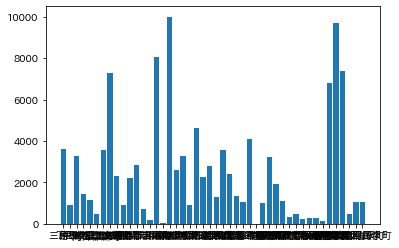

In [185]:
import matplotlib.pyplot as plt
import japanize_matplotlib

x = tmp.index
y = tmp.values
plt.bar(x,y)

<BarContainer object of 46 artists>

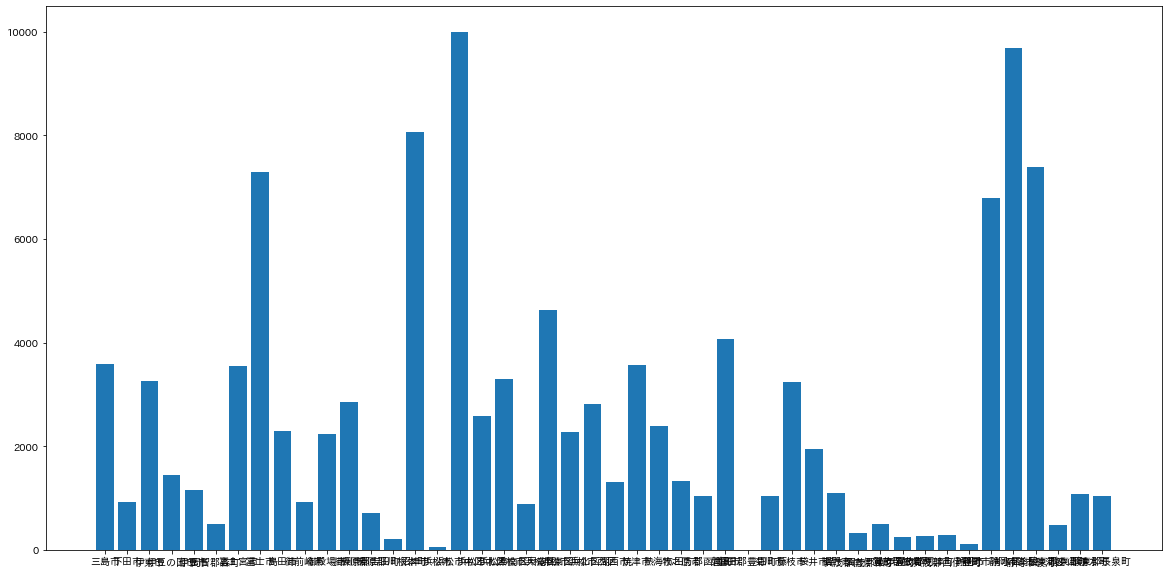

In [186]:
plt.figure(figsize = (20,10))
plt.bar(x,y)

In [187]:
tmp.sort_values(inplace=True,ascending=True)
tmp

cityName
磐田郡豊田町        3
浜松市          47
静岡市         121
榛原郡川根本町     200
賀茂郡松崎町      253
賀茂郡河津町      264
賀茂郡西伊豆町     295
賀茂郡南伊豆町     322
駿東郡小山町      470
周智郡森町       498
賀茂郡東伊豆町     498
榛原郡吉田町      708
浜松市天竜区      887
御前崎市        914
下田市         931
菊川市        1030
駿東郡長泉町     1041
田方郡函南町     1049
駿東郡清水町     1074
裾野市        1094
伊豆市        1163
湖西市        1311
牧之原市       1323
伊豆の国市      1444
袋井市        1942
御殿場市       2228
浜松市浜北区     2266
島田市        2292
熱海市        2394
浜松市北区      2586
浜松市西区      2815
掛川市        2849
藤枝市        3237
伊東市        3257
浜松市南区      3298
富士宮市       3555
焼津市        3568
三島市        3596
磐田市        4078
浜松市東区      4626
静岡市清水区     6796
富士市        7300
静岡市駿河区     7384
沼津市        8060
静岡市葵区      9697
浜松市中区      9994
dtype: int64

<BarContainer object of 46 artists>

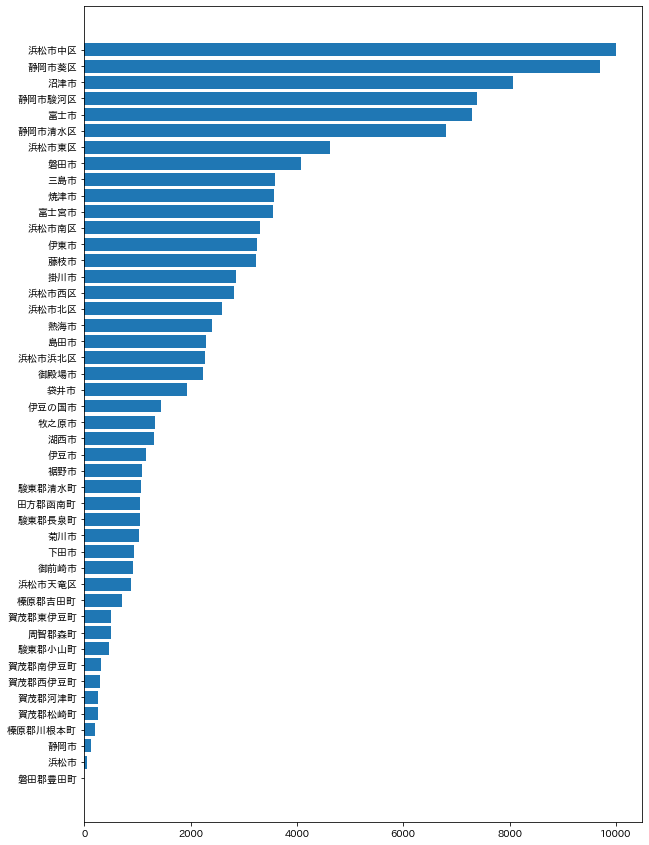

In [188]:
plt.figure(figsize=(10,15))
x = tmp.index
y = tmp.values
plt.barh(x,y)

<BarContainer object of 10 artists>

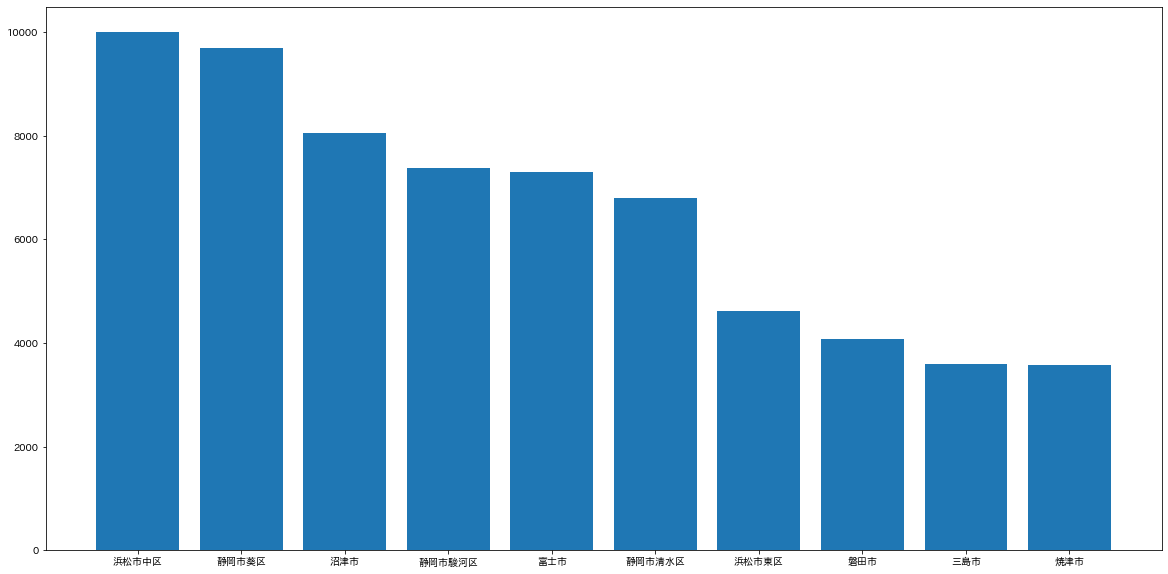

In [189]:
tmp.sort_values(inplace=True,ascending=False)
plt.figure(figsize=(20,10))
x=tmp[:10].index
y=tmp[:10].values
plt.bar(x,y)

Text(0, 0.5, '法人数')

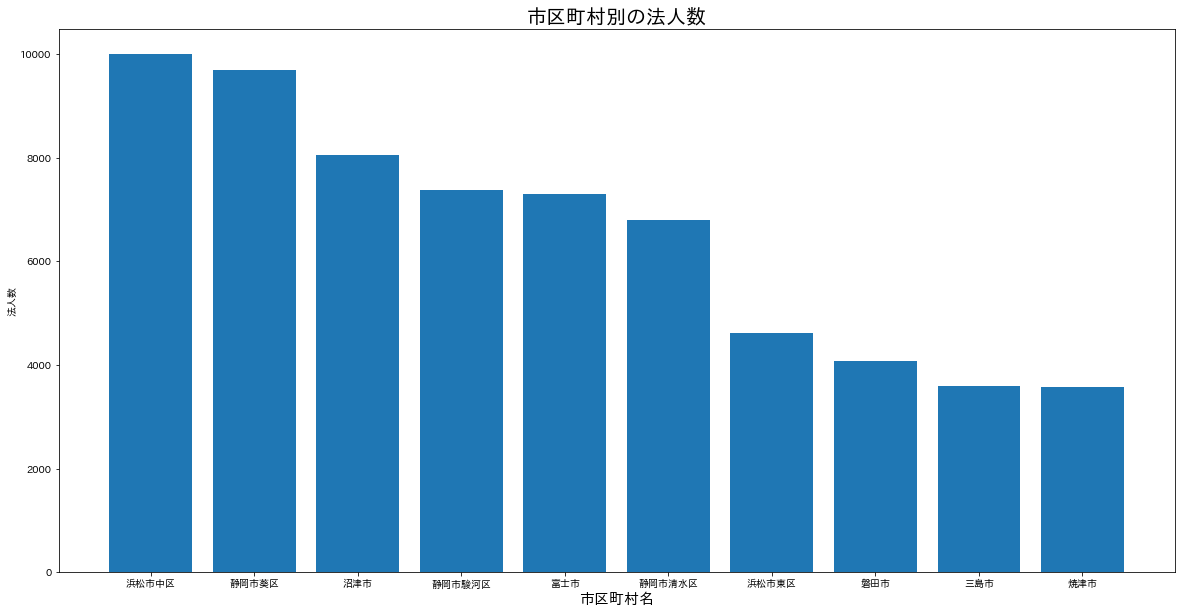

In [190]:
plt.figure(figsize=(20,10))
plt.bar(x,y)
plt.title('市区町村別の法人数',fontsize=20)
plt.xlabel('市区町村名',fontsize=15)
plt.ylabel('法人数')

Text(7.5, 9000, '上位10の自治体を抜粋して表示')

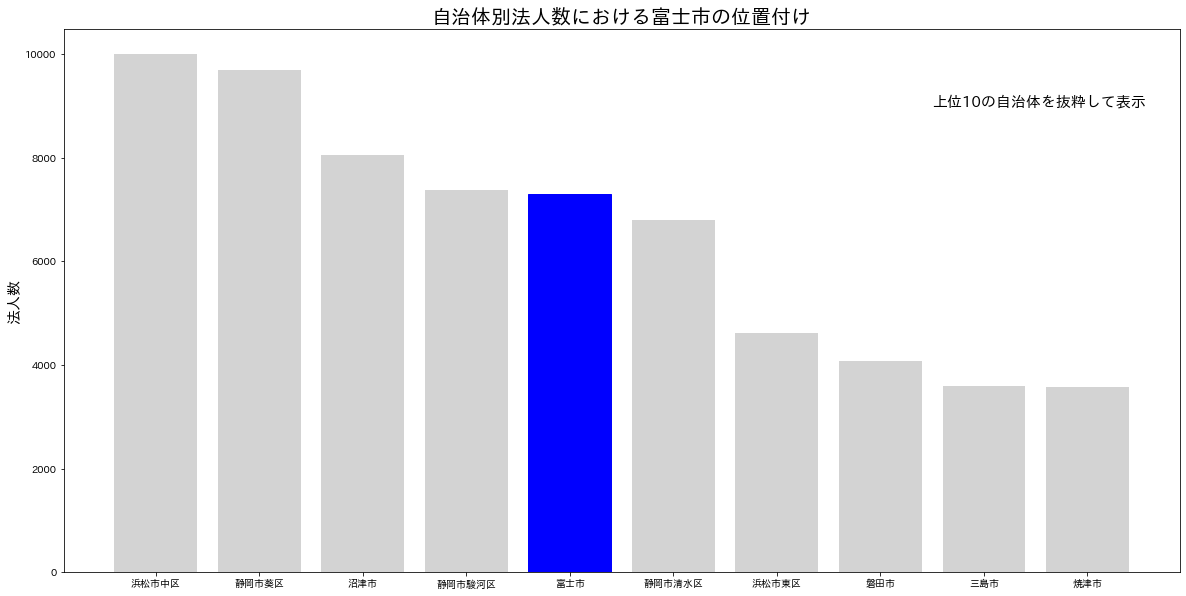

In [191]:
tmp.sort_values(inplace=True,ascending=False)
tmp = tmp[:10]
x=tmp.index
y=tmp.values
fig,ax=plt.subplots(figsize=(20,10))
bar_list=ax.bar(x,y,color='lightgray')
bar_list[4].set_color('blue')
ax.set_title('自治体別法人数における富士市の位置付け',fontsize=20);
ax.set_ylabel('法人数',fontsize=15)
ax.text(7.5,9000,'上位10の自治体を抜粋して表示',fontsize=15)

In [192]:
base_time=pd.Timestamp.now(tz='Asia/Tokyo')
base_time

Timestamp('2022-04-08 00:42:12.365867+0900', tz='Asia/Tokyo')

In [193]:
print(len(data))
data.head()

114758


,cityName,corporateNumber,name,corp_kind_name,process_kbn_name,assignmentDate,updateDate,update_fiscal_year,update_YM
0,静岡市葵区,1000013040008,静岡家庭裁判所,国の機関,新規,2015-10-05,2018-04-02,2018,2018-04
1,静岡市清水区,1000013050072,清水簡易裁判所,国の機関,新規,2015-10-05,2018-04-02,2018,2018-04
2,浜松市中区,1000013050080,浜松簡易裁判所,国の機関,新規,2015-10-05,2018-04-02,2018,2018-04
3,磐田市,1000020222119,磐田市,地方公共団体,新規,2015-10-05,2018-04-05,2018,2018-04
4,焼津市,1000020222127,焼津市,地方公共団体,新規,2015-10-05,2018-04-05,2018,2018-04


In [194]:
data['assignmentDate']=data['assignmentDate'].dt.tz_localize('Asia/Tokyo')
data.head()

,cityName,corporateNumber,name,corp_kind_name,process_kbn_name,assignmentDate,updateDate,update_fiscal_year,update_YM
0,静岡市葵区,1000013040008,静岡家庭裁判所,国の機関,新規,2015-10-05 00:00:00+09:00,2018-04-02,2018,2018-04
1,静岡市清水区,1000013050072,清水簡易裁判所,国の機関,新規,2015-10-05 00:00:00+09:00,2018-04-02,2018,2018-04
2,浜松市中区,1000013050080,浜松簡易裁判所,国の機関,新規,2015-10-05 00:00:00+09:00,2018-04-02,2018,2018-04
3,磐田市,1000020222119,磐田市,地方公共団体,新規,2015-10-05 00:00:00+09:00,2018-04-05,2018,2018-04
4,焼津市,1000020222127,焼津市,地方公共団体,新規,2015-10-05 00:00:00+09:00,2018-04-05,2018,2018-04


In [208]:
delta=pd.Timedelta(393, 'days')
tmp=data.loc[(data['process_kbn_name']=='新規') & (base_time - data['assignmentDate'] <= delta)]
print(len(tmp))
tmp.head()

227


,cityName,corporateNumber,name,corp_kind_name,process_kbn_name,assignmentDate,updateDate,update_fiscal_year,update_YM
1951,静岡市葵区,1080001024056,株式会社ＸＨａｂｉｌｉｓ,株式会社,新規,2021-03-19 00:00:00+09:00,2021-03-19,2020,2021-03
1952,静岡市葵区,1080001024064,抗ウイルスネット株式会社,株式会社,新規,2021-03-31 00:00:00+09:00,2021-03-31,2020,2021-03
3964,静岡市葵区,1080005007346,一般社団法人しずおか建築事務所センター,その他の設立登記法人,新規,2021-03-16 00:00:00+09:00,2021-03-16,2020,2021-03
5759,沼津市,1080101022380,株式会社やまだいふぁーむ,株式会社,新規,2021-03-15 00:00:00+09:00,2021-03-15,2020,2021-03
5760,沼津市,1080101022389,株式会社ＨＡＲＵＡ,株式会社,新規,2021-03-22 00:00:00+09:00,2021-03-22,2020,2021-03


<BarContainer object of 10 artists>

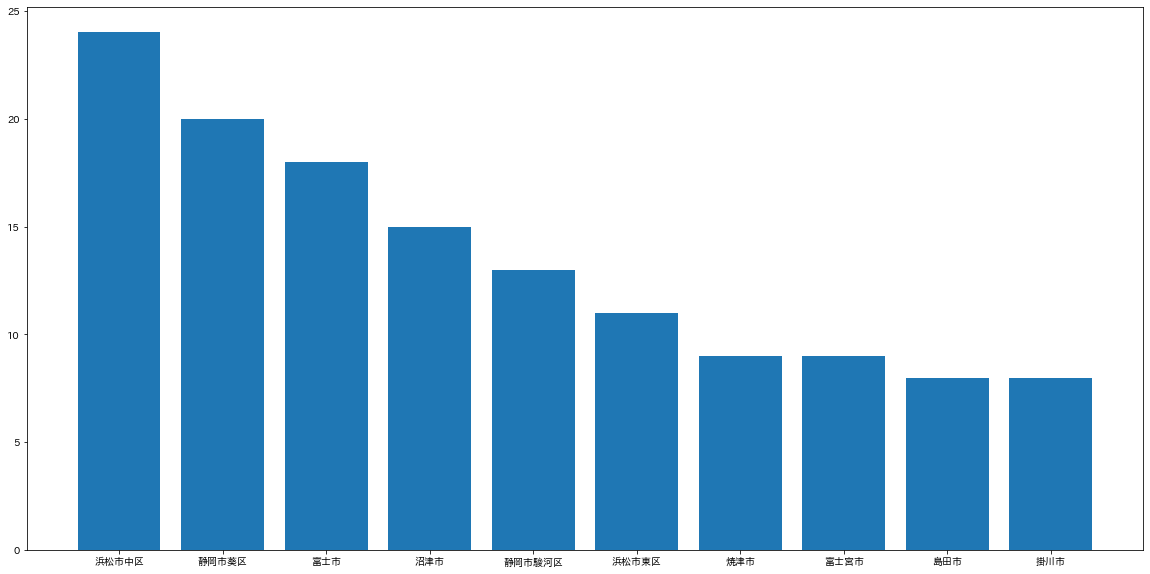

In [209]:
tmp=tmp.groupby('cityName').size()
tmp.sort_values(inplace=True,ascending=False)
tmp=tmp[:10]
x=tmp.index
y=tmp.values
plt.figure(figsize=(20,10))
plt.bar(x,y)

In [210]:
base_time=pd.Timestamp('2020-04-16',tz='Asia/Tokyo')
tmp=data.loc[(data['process_kbn_name']=='新規') & (base_time - data['assignmentDate'] <= delta)]
print(len(tmp))
tmp.head()

4458


,cityName,corporateNumber,name,corp_kind_name,process_kbn_name,assignmentDate,updateDate,update_fiscal_year,update_YM
1845,牧之原市,1080001022753,Ｓｕｒｆ Ｓｔａｄｉｕｍ Ｊａｐａｎ株式会社,株式会社,新規,2019-03-27 00:00:00+09:00,2019-04-01,2019,2019-04
1846,静岡市清水区,1080001022761,株式会社ネクサス,株式会社,新規,2019-03-28 00:00:00+09:00,2019-04-02,2019,2019-04
1847,牧之原市,1080001022778,株式会社ＴＲＳ,株式会社,新規,2019-04-03 00:00:00+09:00,2019-04-08,2019,2019-04
1848,静岡市葵区,1080001022786,株式会社サンライズ,株式会社,新規,2019-04-04 00:00:00+09:00,2019-04-09,2019,2019-04
1850,静岡市駿河区,1080001022803,株式会社ＢａｂｙＢａｃｈ,株式会社,新規,2019-04-04 00:00:00+09:00,2019-04-09,2019,2019-04


<BarContainer object of 10 artists>

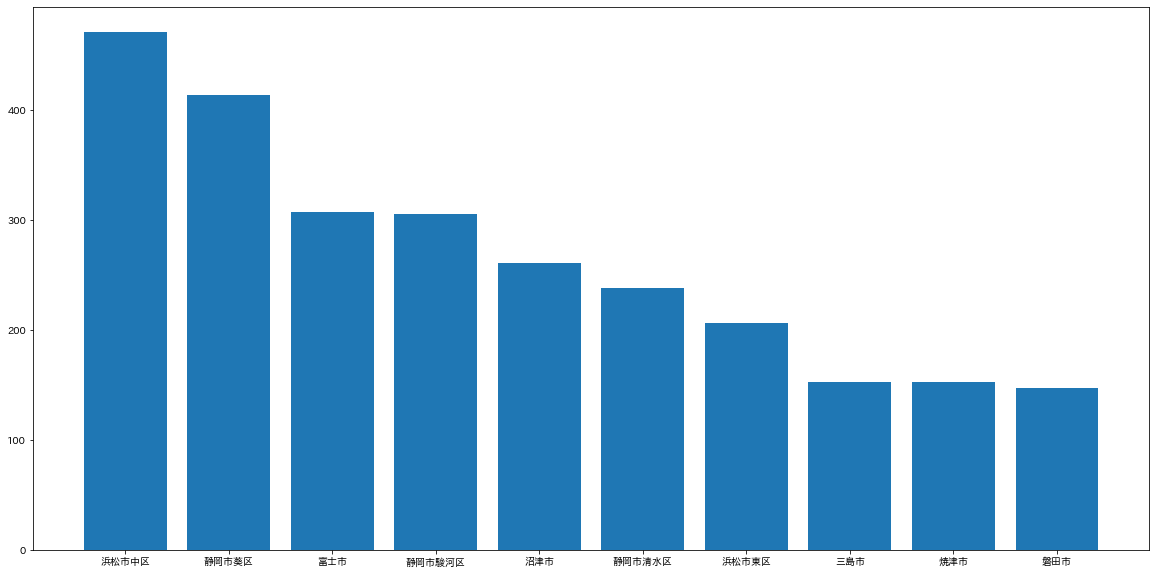

In [211]:
tmp=tmp.groupby('cityName').size()
tmp.sort_values(inplace=True,ascending=False)
tmp=tmp[:10]
x=tmp.index
y=tmp.values
plt.figure(figsize=(20,10))
plt.bar(x,y)

## ノック２：読み込んだデータを確認しよう

## ノック３：ヘッダ用のテキストファイルを読み込もう

## ノック４：ヘッダ行を追加しよう

## ノック５：統計量や欠損値を確認しよう

## ノック６：データの追加（繰り返し・読込・抽出・結合）

## ノック７：マスタを読み込んで項目を横に繋げよう

## ノック８：テキストの連結や分割をしよう

## ノック９：日付を加工しよう

## ノック１０：年度を設定しよう

## ノック１１：加工したデータをファイルに出力しよう

## ノック１２：不要な項目の削除と並べ替えをしよう

## ノック１３：まとまった単位で集計しよう

## ノック１４：市区町村別の法人数を可視化しよう

## ノック１５：グラフの縦横と表示順を変えてみよう

## ノック１６：グラフのタイトルとラベルを設定しよう

## ノック１７：グラフの見た目をもっと変えてみよう

## ノック１８：９０日以内に新規登録された法人数を可視化してみよう

## ノック１９：年度別の推移を可視化しよう

## ノック２０：データとグラフを出力しよう